<a href="https://colab.research.google.com/github/isra-bWk4/upsrj-machine-learning/blob/main/LinearRegressionPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica de Regresión Lineal

En esta práctica se implementa un modelo de **regresión lineal** utilizando la librería *Scikit-Learn*.  
El objetivo es analizar la relación entre **horas de estudio** (variable independiente) y la **calificación final** (variable dependiente), simulando un caso de la vida real.

Para ello:
- Se genera un conjunto de datos sintéticos y se almacena en un archivo CSV.
- Se construye un *pipeline* que incluye el escalado de los datos y un modelo de regresión lineal.
- Se entrena el modelo y se evalúa su desempeño mediante métricas estadísticas.
- Finalmente, se visualiza la relación entre las variables y la predicción del modelo.

Esta práctica permite comprender el flujo completo de trabajo en un problema básico de *machine learning supervisado*.


Se importan las librerías necesarias para el desarrollo de la práctica.  
Se utilizan bibliotecas para el manejo de datos, generación de gráficos y para la implementación y evaluación de un modelo de regresión lineal mediante **Scikit-Learn**.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


En esta celda se define una función para **visualizar los resultados de un modelo de regresión lineal previamente entrenado**.
La función muestra los datos reales mediante un diagrama de dispersión y superpone la línea de
predicción obtenida a partir del modelo.

De esta manera, se facilita la interpretación del ajuste del modelo y la relación entre las
horas de estudio y la calificación estimada.


In [34]:
def plot_model(xlabel: str, ylabel: str, title: str):
  """
  Función para graficar el modelo de regresión lineal lineal.
  """
  plt.scatter(X,y, label="Datos reales")
  plt.plot(X,y_pred,color="red", label="Modelo lineal")
  plt.xlabel("Horas de estudio")
  plt.ylabel("Calificacion")
  plt.scatter(X,y)
  plt.title("Estimación de calificación en base a las horas de estudio")
  plt.grid(True)
  plt.show()

En esta celda se genera el conjunto de datos sintéticos que será utilizado para entrenar
el modelo de regresión lineal. Se definen las horas de estudio como variable independiente,
utilizando incrementos de cuatro en cuatro para obtener 100 observaciones.

La calificación se calcula a partir de una relación lineal, a la cual se le añade ruido
aleatorio para simular la variabilidad presente en un escenario real. Posteriormente,
los valores de la calificación se limitan al rango de 50 a 100, correspondiente a un
sistema de evaluación válido. Finalmente, los datos se almacenan en un archivo CSV.


In [35]:
np.random.seed(42)

# Variable independiente: horas de estudio (4 en 4, 100 valores)
horas_estudio = np.arange(4, 401, 4)

# Relación lineal + ruido
calificacion = 0.12 * horas_estudio + 50 + np.random.normal(0, 4, 100)

# Limitar calificaciones entre 50 y 100
calificacion = np.clip(calificacion, 50, 100)

# Crear DataFrame
df = pd.DataFrame({
    "Horas_Estudio": horas_estudio,
    "Calificacion": calificacion
})

# Guardar CSV
df.to_csv("study_vs_grade.csv", index=False)

df.head()

,Horas_Estudio,Calificacion
0,4,52.466857
1,8,50.406943
2,12,54.030754
3,16,58.012119
4,20,51.463387


En esta celda se carga el archivo CSV previamente generado y se separan las variables
independiente y dependiente. La variable **Horas_Estudio** se almacena en una estructura
bidimensional, como lo requiere Scikit-Learn, mientras que la variable **Calificacion**
se maneja como un arreglo unidimensional.

Finalmente, se imprimen las dimensiones de ambas variables para verificar que los datos
tienen la forma correcta antes de ser utilizados en el entrenamiento del modelo.


In [36]:
data = pd.read_csv("study_vs_grade.csv")

X = data[["Horas_Estudio"]]  # 2D obligatorio
y = data["Calificacion"]    # 1D

print(X.shape)
print(y.shape)

(100, 1)
(100,)


En esta celda se construye un *pipeline* que integra el **escalado de los datos** y el
**modelo de regresión lineal**. El uso de un escalador permite normalizar la variable
independiente, evitando problemas derivados de la magnitud de los valores.

Posteriormente, el modelo es entrenado utilizando las variables definidas previamente.
Una vez entrenado, se generan las predicciones correspondientes a la calificación
estimada. Finalmente, se utiliza una función de visualización para mostrar gráficamente
los datos reales junto con la predicción obtenida por el modelo.


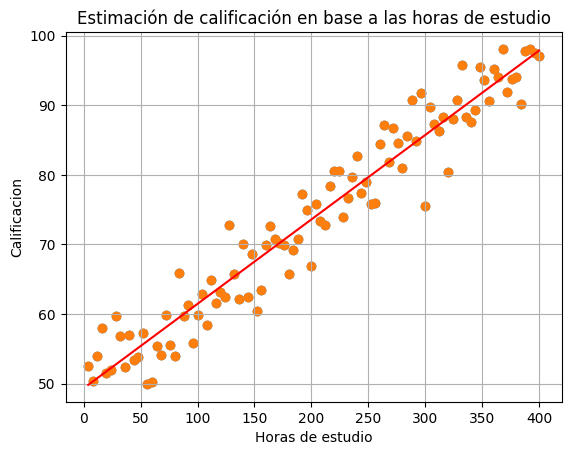

In [37]:
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("regresor", LinearRegression())
])

pipeline.fit(X, y)

y_pred = pipeline.predict(X)

plot_model(xlabel="Horas de estudio.", ylabel="Calificación.",
           title="Estimación de calificación en base a las horas de estudio.")